# APS106 Featuring... MAT188
#### Author: Behrang Mohajer, APS106 Lab TA

This document was provided in APS106 winter 2024 in University of Toronto. We solve Homework 5 of MAT188 (linear algebra) in fall 2023 with python with the same data that MAT188 team provided. The data are provided with this code and must be read from the same directory as this file. We would like to thank the MAT188 teaching team for sharind this homework with us.

## NumPy
`NumPy` is a powerful Python library for numerical computing. It provides support for multidimensional arrays (like matrices), along with a collection of mathematical functions to operate on these arrays efficiently. `NumPy` is widely used in scientific computing, data analysis, and machine learning due to its speed and versatility. It's often a foundational library in many Python-based data science projects. 

**`NumPy` is beyond the scope of APS106 and is simply being used for demonstration purposes.**

Let's import `NumPy` using the common alias `np`.

In [1]:
import numpy as np

# Problem 2  
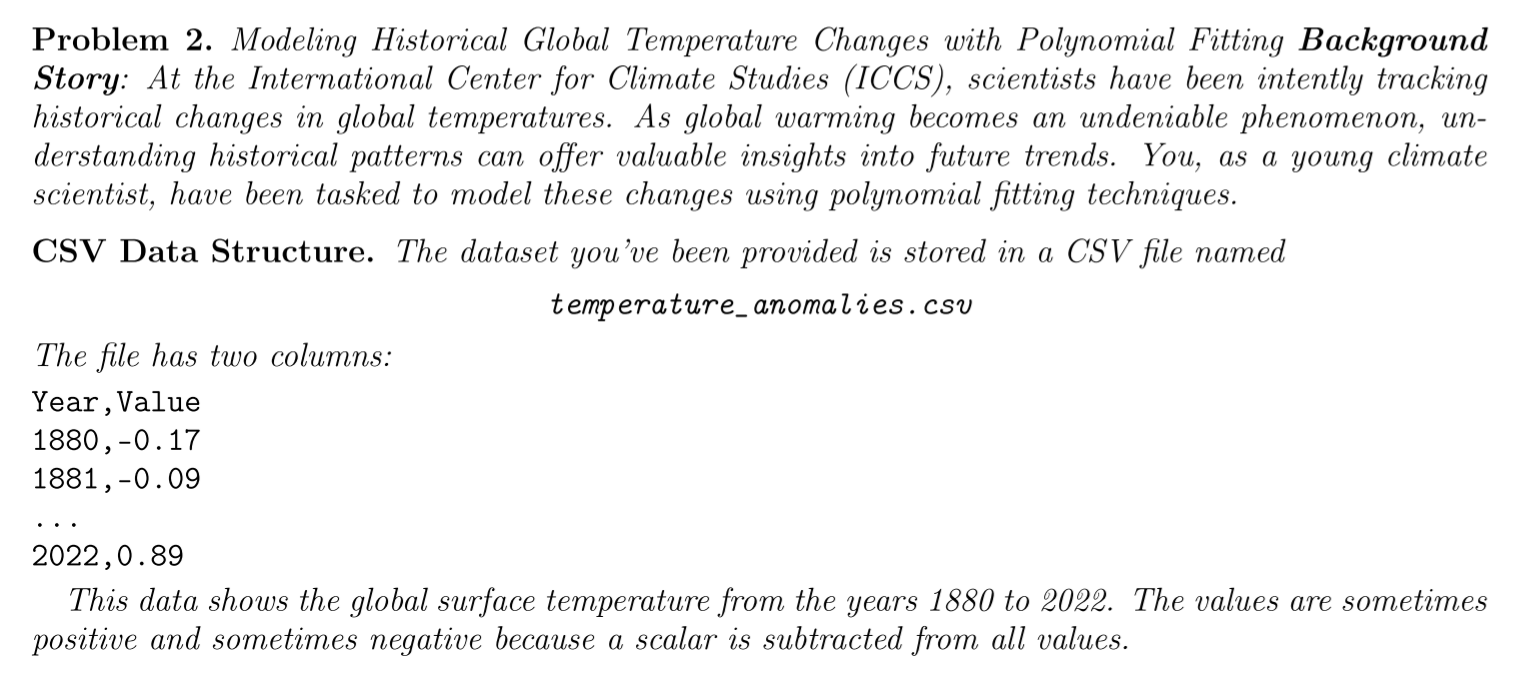

In [2]:
import pandas as pd     # This library handles a csv file. Note one could use "import csv", as well.

# Reading the file from the same directory; the path is crucial, and indicating there is no header row
# it is good to lpractice learning libraries from their documentation:
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
data = pd.read_csv('temperature_anomalies.csv', header=None)

# polynomial degree - Let's input all what we need in the beginning; that makes it easier to modify them later on.
n = 3

# Let's check the first 5 rows and columns to have an idea abouut the csv file:
data.head()

,0,1,2,3,4,5,6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Year,Value,NaN,NaN,NaN,NaN
2,NaN,1880,-0.17,NaN,NaN,NaN,NaN
3,NaN,1881,-0.09,NaN,NaN,NaN,NaN
4,NaN,1882,-0.11,NaN,NaN,NaN,NaN


In [3]:
# interchangably, one can use this syntax to gte the size of the dataframe:
data.info

<bound method DataFrame.info of       0     1      2   3   4   5   6
0   NaN   NaN    NaN NaN NaN NaN NaN
1   NaN  Year  Value NaN NaN NaN NaN
2   NaN  1880  -0.17 NaN NaN NaN NaN
3   NaN  1881  -0.09 NaN NaN NaN NaN
4   NaN  1882  -0.11 NaN NaN NaN NaN
..   ..   ...    ...  ..  ..  ..  ..
140 NaN  2018   0.85 NaN NaN NaN NaN
141 NaN  2019   0.97 NaN NaN NaN NaN
142 NaN  2020   1.01 NaN NaN NaN NaN
143 NaN  2021   0.84 NaN NaN NaN NaN
144 NaN  2022   0.89 NaN NaN NaN NaN

[145 rows x 7 columns]>

## Solution to Task 1
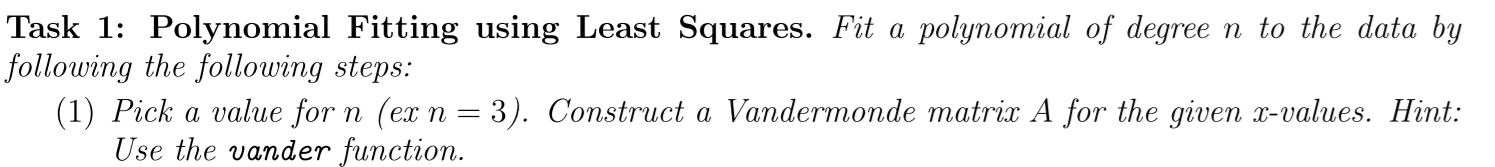  
As shown in the result, the first row and the first coloumn of the data are redundant.

In [4]:
# The firts row (data[0]) is all NaN. So, we filter out column 1 and 2 from the datafram 'data'.
year = data[1]; value = data[2]
print(year)

0       NaN
1      Year
2      1880
3      1881
4      1882
       ... 
140    2018
141    2019
142    2020
143    2021
144    2022
Name: 1, Length: 145, dtype: object


In [5]:
# Let's get rod of the frist two elemenets of year and value:
year = year[2:] ;   value= value[2:]

# feel free to check the result with print(year)

The __Vandermonde__ function in the NumPy library is required. Most mathematical operations in Python are already implemented, so we don't need to write the code from scratch. In fact, the pre-existing libraries are typically superior because they take into account both the coding and hardware acceleration.  
This is challenging because our data is in the **dataframe** type, but a NumPy method requires an __input of NumPy arrays__. Although they are great, dataframes are meant for data handling and data engineering. NumPy arrays, on the other hand, are more relevant to other engineering domains and capable of performing a wide range of quick mathematic and scientific computing. Therefore, we convert our data to arrays for APS106.  
Alternatively, one could write a function to perform the Vandermonde operation without the variable type conversion, but they will need to convert them in the following operations.

In [6]:
# We can use polyvander to Construct a Vandermonde matrix.
# Further info on: https://www.tutorialspoint.com/generate-a-vandermonde-matrix-of-given-degree-in-python 
from numpy.polynomial.polynomial import polyvander 

# Let's see how plyvander works:
print(polyvander([1 ,2, 3, 4], 2))

[[ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]]


The dataframe *year* has the type of **string** and 
```
year=to_numpy()
```
would result in a NumPy array of **string**. So, we need to perform two type conversions. The same applies to *value*.  
The take-away is type conversion is critical to undestand libraries.

In [7]:
# Conversion with data type (dtype) to int and float:
year = year.to_numpy(dtype = int) ; value = value.to_numpy(dtype = float)

# Vandermonde:
vander_matrix = polyvander(year, n)

Note a good code has fewer lines of code and is simple to read!

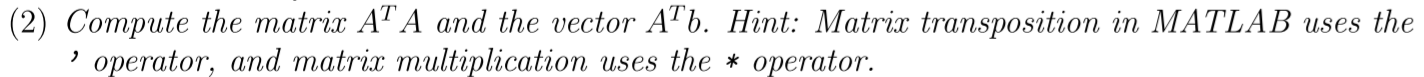  
Using the start (*) will apply an elemnet-wise multiplication of matrices of the same size:
```
matrix_1 * matrix_2
```  
Will result in a shape error if these two matrices don't have the same shape.   
Therefore, one must use *NumPy Matrix Multiplication*, i.e.,  

 ```numpy.matmul(matrix_1 , matrix_2)```  
  
which inputs two matrices.  
If you are wondering how I know it, I just googled "matrix multiplication of two numpy arrays".  
So we can calculate $$A^TA $$

In [8]:
ATA =  np.matmul( vander_matrix.transpose() , vander_matrix) 

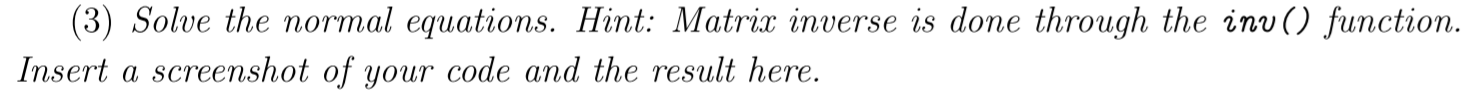  
and $$A^Tb$$

In [9]:
ATb = np.matmul( vander_matrix.transpose() , value)

# Solving the system:
    # Taking the inverse of ATA with https://www.tutorialspoint.com/how-to-invert-a-matrix-or-narray-in-python 
    #       np.linalg.inv(ATA)
    # there are more options available.

    # Solution array, i,e, the coefficients of the polyfit requires another matrix multiplication:
coefficients = np.matmul(   np.linalg.inv(ATA)  ,    ATb  )

print(coefficients)

[-2.57620964e+03  4.11754096e+00 -2.19397467e-03  3.89689263e-07]
